__1.__  Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 42)

In [9]:
coef

array([40.71064891,  6.60098441])

In [10]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = np.dot(X, w)
    return (sum((y - y_pred)**2)) / len(y)

In [79]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(42)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w - 2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)




In [80]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list2 = [w.copy()]

# список значений ошибок после каждой итерации
errors2 = []

# счетчик итераций
iter_num2 = 0

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num2 < max_iter:

    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list2.append(new_w.copy())
    errors2.append(mserror(X, new_w, y))
    
    iter_num2 += 1
    w = new_w
    
w_list2 = np.array(w_list2)


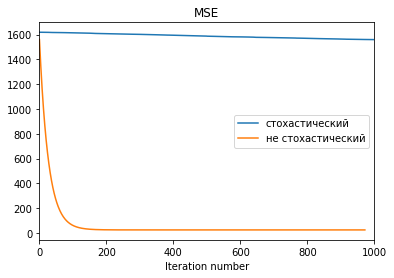

In [81]:
plt.plot(range(len(errors)), errors, label = 'стохастический')
plt.plot(range(len(errors2)), errors2, label = 'не стохастический')
plt.xlim(0, 1000)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.legend()

Скорость снижение MSE гораздо выше у градиентного спуска, чем у  стохастического градиентного спуска

__2.__ Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [89]:
# реализуем функцию, определяющую среднеквадратичную ошибку с L2-регуляризацией
def mserror_l2(X, w, y_pred, lambda_):
    y = np.dot(X, w)
    return (sum((y - y_pred)**2)) / len(y) + lambda_ * sum(w**2)

In [93]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list3 = [w.copy()]

# список значений ошибок после каждой итерации
errors3 = []

# зададим начальную разницу весов большим числом
weight_dist3 = np.inf

# счетчик итераций
iter_num3 = 0

lambda_ = 0.5


# ход градиентного спуска
while weight_dist3 > min_weight_dist and iter_num3 < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w - 2 * eta * (np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0] + 2 * lambda_ * w)

    weight_dist3 = np.linalg.norm(new_w - w, ord=2)
    
    w_list3.append(new_w.copy())
    errors3.append(mserror_l2(X, new_w, y, lambda_))
    
    iter_num3 += 1
    w = new_w
    
w_list3 = np.array(w_list3)


In [94]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list4 = [w.copy()]

# список значений ошибок после каждой итерации
errors4 = []

# счетчик итераций
iter_num4 = 0

# зададим начальную разницу весов большим числом
weight_dist4 = np.inf

lambda_ = 0.5

# ход градиентного спуска
while weight_dist4 > min_weight_dist and iter_num4 < max_iter:

    new_w = w - 2 * eta * (np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + 2 * lambda_ * w)

    weight_dist4 = np.linalg.norm(new_w - w, ord=2)
    
    w_list4.append(new_w.copy())
    errors4.append(mserror_l2(X, new_w, y, lambda_))
    
    iter_num4 += 1
    w = new_w
    
w_list4 = np.array(w_list4)

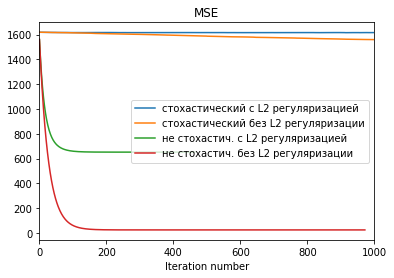

In [95]:
plt.plot(range(len(errors3)), errors3, label = 'стохастический с L2 регуляризацией')
plt.plot(range(len(errors)), errors, label = 'стохастический без L2 регуляризации')
plt.plot(range(len(errors4)), errors4, label = 'не стохастич. с L2 регуляризацией')
plt.plot(range(len(errors2)), errors2, label = 'не стохастич. без L2 регуляризации')
plt.xlim(0, 1000)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.legend()

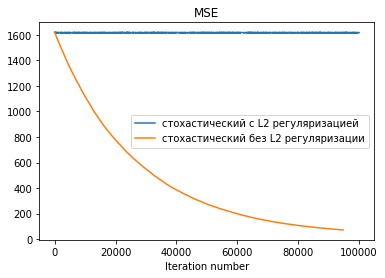

In [96]:
plt.plot(range(len(errors3)), errors3, label = 'стохастический с L2 регуляризацией')
plt.plot(range(len(errors)), errors, label = 'стохастический без L2 регуляризации')
# plt.xlim(0, 60000)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.legend()

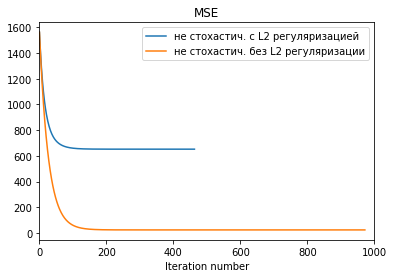

In [97]:
plt.plot(range(len(errors4)), errors4, label = 'не стохастич. с L2 регуляризацией')
plt.plot(range(len(errors2)), errors2, label = 'не стохастич. без L2 регуляризации')
plt.xlim(0, 1000)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.legend()

При L2-регуляризации требуется меньше итераций для достижения сходимости. Значение MSE получается больше, так как это уже не только величина ошибки, но и норма весов

__3 [опция].__ Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [98]:
# реализуем функцию, определяющую среднеквадратичную ошибку с L2-регуляризацией
def mserror_l1(X, w, y_pred, lambda_):
    y = np.dot(X, w)
    return (sum((y - y_pred)**2)) / len(y) + lambda_ * sum(abs(w))

In [105]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list5 = [w.copy()]

# список значений ошибок после каждой итерации
errors5 = []

# зададим начальную разницу весов большим числом
weight_dist5 = np.inf

# счетчик итераций
iter_num5 = 0

lambda_ = 1


# ход градиентного спуска
while weight_dist5 > min_weight_dist and iter_num5 < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])
    
    new_w = w - 2 * eta * (np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0] + lambda_ * np.sign(w))

    weight_dist5 = np.linalg.norm(new_w - w, ord=2)
    
    w_list5.append(new_w.copy())
    errors5.append(mserror_l1(X, new_w, y, lambda_))
    
    iter_num5 += 1
    w = new_w
    
w_list5 = np.array(w_list5)


In [106]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list6 = [w.copy()]

# список значений ошибок после каждой итерации
errors6 = []

# счетчик итераций
iter_num6 = 0

# зададим начальную разницу весов большим числом
weight_dist6 = np.inf

lambda_ = 1

# ход градиентного спуска
while weight_dist6 > min_weight_dist and iter_num6 < max_iter:

    new_w = w - 2 * eta * (np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0] + lambda_ * np.sign(w))

    weight_dist6 = np.linalg.norm(new_w - w, ord=2)
    
    w_list6.append(new_w.copy())
    errors6.append(mserror_l1(X, new_w, y, lambda_))
    
    iter_num6 += 1
    w = new_w
    
w_list6 = np.array(w_list6)

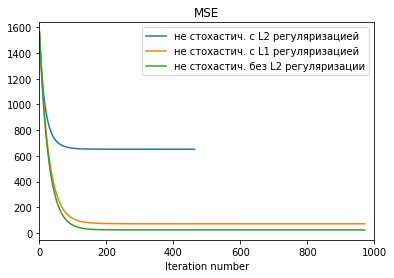

In [107]:
plt.plot(range(len(errors4)), errors4, label = 'не стохастич. с L2 регуляризацией')
plt.plot(range(len(errors6)), errors6, label = 'не стохастич. с L1 регуляризацией')
plt.plot(range(len(errors2)), errors2, label = 'не стохастич. без L2 регуляризации')
plt.xlim(0, 1000)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.legend()